In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
path = "../data/processed/superstore_clean.csv"
df = pd.read_csv(path)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9194 entries, 0 to 9193
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   row_id         9194 non-null   int64         
 1   order_id       9194 non-null   object        
 2   order_date     9194 non-null   datetime64[ns]
 3   ship_date      9194 non-null   datetime64[ns]
 4   ship_mode      9194 non-null   object        
 5   customer_id    9194 non-null   object        
 6   customer_name  9194 non-null   object        
 7   segment        9194 non-null   object        
 8   country        9194 non-null   object        
 9   city           9194 non-null   object        
 10  state          9194 non-null   object        
 11  postal_code    9194 non-null   int64         
 12  region         9194 non-null   object        
 13  product_id     9194 non-null   object        
 14  category       9194 non-null   object        
 15  sub_category   9194 n

In [7]:
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst= False)
df['ship_date'] = pd.to_datetime(df['ship_date'], dayfirst= False)

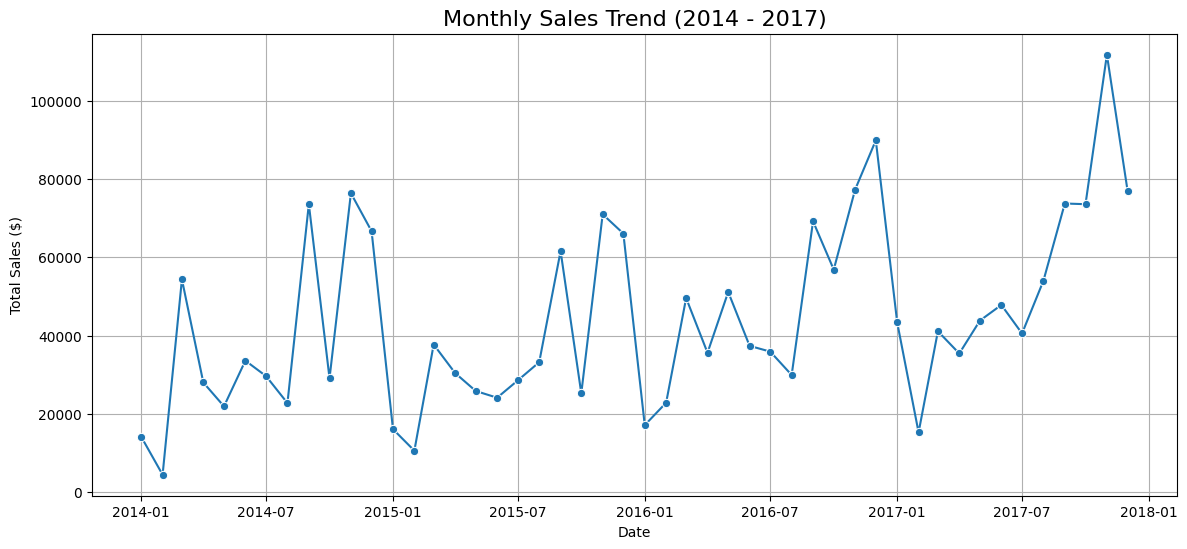

In [13]:
# Monthly Sales Trend (The most important plot for forecasting)
# We aggregate sales by "Month Start" (MS)
monthly_sales = df.set_index('order_date').resample('MS')['sales'].sum().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_sales, x='order_date', y='sales', marker='o')
plt.title('Monthly Sales Trend (2014 - 2017)', fontsize=16)
plt.ylabel('Total Sales ($)')
plt.xlabel('Date')
plt.grid(True)
plt.show()

In [16]:
df['country'].describe()

count              9194
unique                1
top       United States
freq               9194
Name: country, dtype: object